# Luca Corsetti 0001131095

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

random_state=777

np.random.seed(random_state)

Consider the file provided with the assignment and execute the analysis described below according to the best practices of Machine Learning. You are
allowed to use only the computers of the lab, you are not allowed to use any other device, email or any other messaging tool. You can use only the websites
accessible through the computers of the lab, as listed in the following page.
Cooperative work will be heavily sanctioned

The notebook must operate as follows:
1. Load the file data.csv, explore the data showing size and do some data
exploration . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1pt
2. Deal with null values, imputing the mean for numeric features and the
string “unknown” for categorical features . . . . . . . . . . . . . . . . . . . . . . . . . 2pt
3. train, optimize and test two classifier models of your choice, the
optimization must be done with cross validation, optimize the f1-
score_macro . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 4pt
4. show the result for both models, including the optimal hyperparameter
values . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1pt
5. repeat the experiment using the best model found in the previous steps
and doing feature selection . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 4pt
6. show the results with the best hyperparameter values . . . . . . . . . . . . 1pt
7. comment the results of the two experiments . . . . . . . . . . . . . . . . . . . . 3pt

### 1. Load the file data.csv, explore the data showing size and do some data exploration

In [2]:
df = pd.read_csv('./data.csv', index_col=0)

df.head()

F00       F01       F02       F03       F04       F05       F06       F07  \
0  NaN  0.430770 -0.609499  0.153154 -0.244014  1.515603  0.153154  0.950208   
1  NaN  0.926832 -1.232067 -2.397645 -2.147707 -0.907709 -2.397645 -3.431166   
2  NaN  1.488724  1.732096 -0.247872  2.564819 -0.744121 -0.247872 -0.298340   
3  NaN  0.476623  0.494316  0.585131  0.434526 -0.670993  0.585131  1.527264   
4  NaN  1.873207 -0.399677 -1.768674  0.600575  0.274092 -1.768674 -2.147604   

        F08       F09       F10       F11  F12 F13       F14  class  
0 -0.533577  0.153154 -1.188635  0.117022    0   D  0.078747      1  
1 -0.851632 -2.397645 -0.614415 -0.641244    0   C -0.277881      1  
2 -0.276540 -0.247872  1.395205 -0.290211    6   B  1.070634      0  
3  0.370484  0.585131 -0.549108  0.009128    0   B  0.524313      1  
4  0.623849 -1.768674 -0.387073 -0.470436    3   D  0.411954      2

In [3]:
print(f"the dataset has {df.shape[0]} rows and {df.shape[1]} columns")

the dataset has 1000 rows and 16 columns


In [4]:
df.describe()

F00          F01          F02          F03          F04  \
count  50.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    0.190899     0.464389     0.024135    -0.090224     0.597048   
std     1.664705     1.253621     0.981668     1.047949     1.525925   
min    -4.768419    -3.839055    -3.678544    -2.900095    -5.303289   
25%    -0.653835    -0.261353    -0.643978    -0.847538    -0.302429   
50%     0.528885     0.554465     0.041989    -0.186079     0.754161   
75%     1.433727     1.289121     0.683684     0.565310     1.647466   
max     2.741977     4.105899     3.140142     3.755152     4.404735   

               F05          F06          F07          F08          F09  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.019323    -0.090224    -0.018502     0.017389    -0.090224   
std       1.007243     1.047949     1.493104     0.995193     1.047949   
min      -3.411312    -2.900095    -4.593151    -2.870350    -2.900095   
25%      -0.635943    -0.847538    -1.070465    -0.650032    -0.847538   
50%      -0.019371    -0.186079    -0.046749     0.041118    -0.186079   
75%       0.618085     0.565310     1.049437     0.715784     0.565310   
max       3.311701     3.755152     4.658191     2.651399     3.755152   

               F10          F11          F12          F14        class  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean      0.200876     0.019299     2.481000     0.163715     0.505000  
std       1.649333     1.015434     2.280974     0.534304     0.596935  
min      -4.562059    -3.375156     0.000000    -1.613691     0.000000  
25%      -1.024788    -0.657205     1.000000    -0.213942     0.000000  
50%       0.166277     0.038561     2.000000     0.148387     0.000000  
75%       1.347618     0.660219     4.000000     0.523251     1.000000  
max       5.344298     3.497461     7.000000     1.775008     2.000000

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


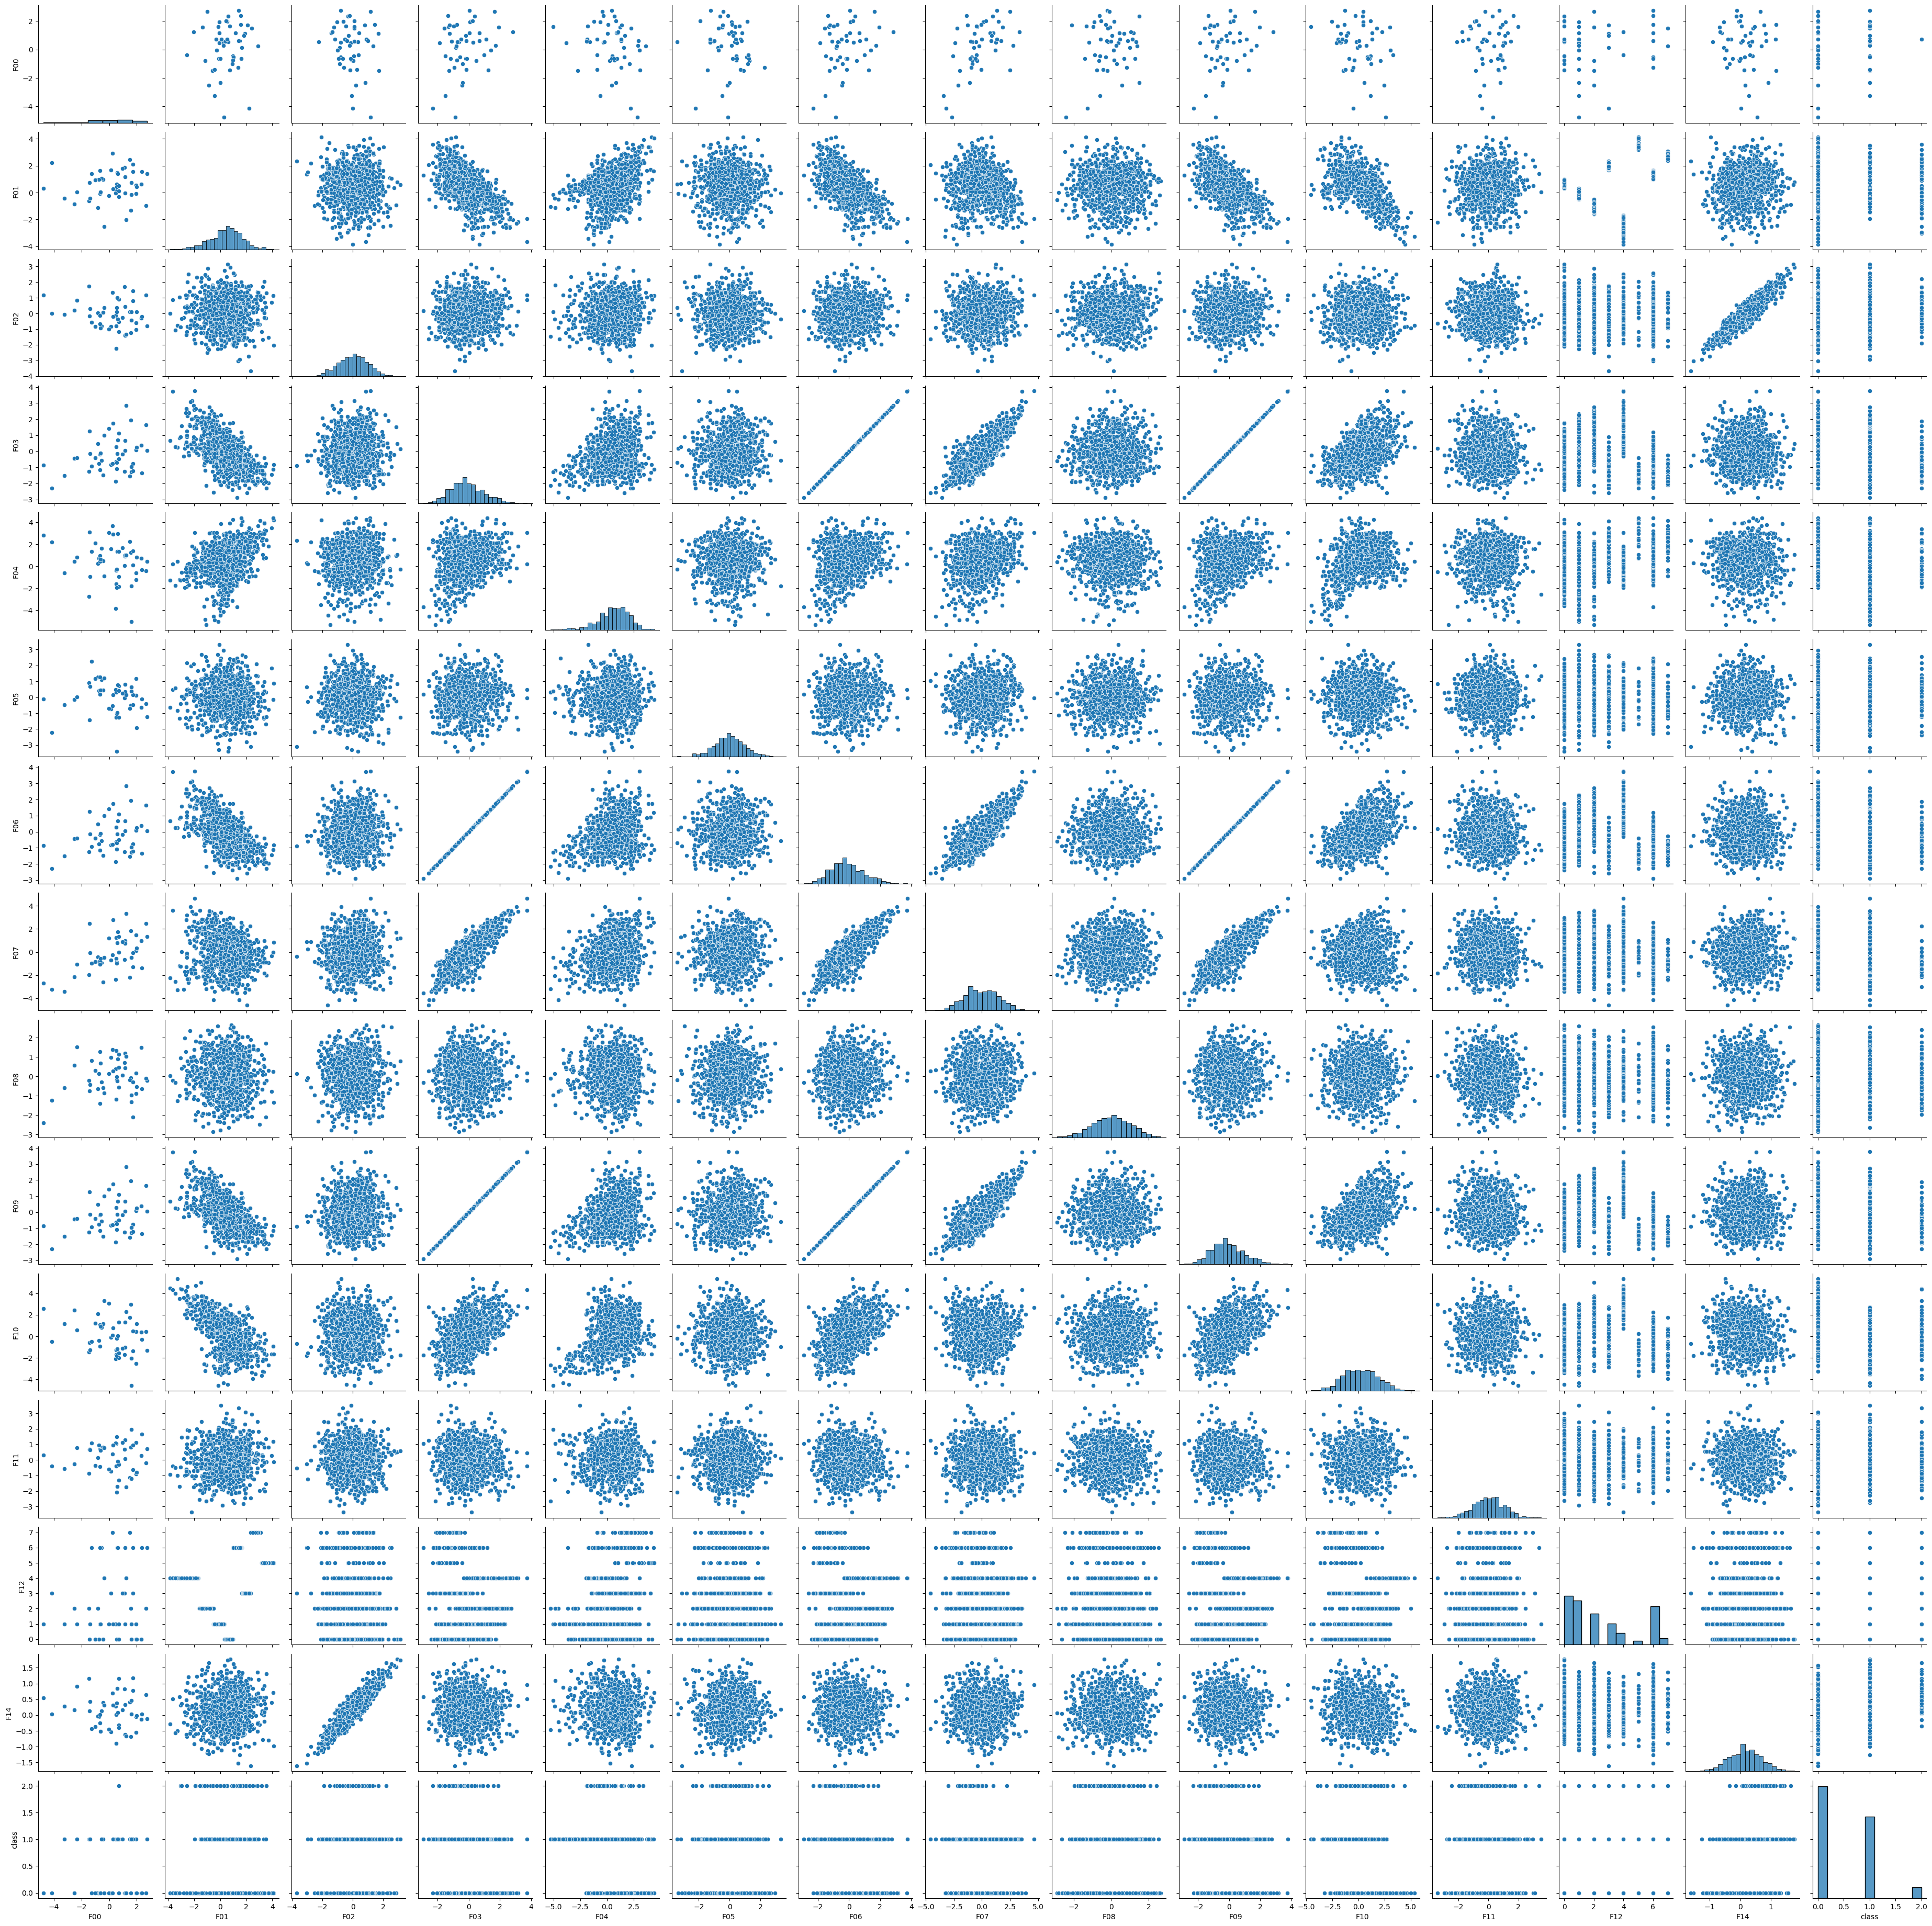

In [5]:
sns.pairplot(df)

In [6]:
print(f"there are {df['F00'].isna().sum()} rows with F00 having NaN values out of {df.shape[0]} records in the dataset")

there are 950 rows with F00 having NaN values out of 1000 records in the dataset


- the data is composed for the majority of numeric values
- the column 'class' denotes the column that will be used to classify the data.
- the column 'F13' seems to represent some sort of category
- the column 'F00' seems to have lots of NaN values, in fact 950 out of 1000 rows in the dataset have missing value in this column. we will likely need to work on the column, either by purging it entirely or by filling it with some values

the dataset has a lot of features, we may therefore encounter not-so-great performances on our trained classifiers. maybe we will need to do some feature selection to improve our models

### 2. Deal with null values, imputing the mean for numeric features and the string “unknown” for categorical features

In [7]:
df.isna().sum()

F00      950
F01        0
F02        0
F03        0
F04        0
F05        0
F06        0
F07        0
F08        0
F09        0
F10        0
F11        0
F12        0
F13        0
F14        0
class      0
dtype: int64

only the column "F00" seems to have NaN values, we proceed by setting it with the mean of the values present for the same feature column

In [8]:
mean = df['F00'].mean()

df['F00'] = df['F00'].replace(np.nan, mean)

# we could also do this iteratively for each column

# for c in df.columns:
#    mean = df[c].mean()

#    df[c] = df[c].replace(np.nan, mean)

categorical features do not seem to be having missing values, but in order for the classifiers to work, we need to encode them in a numeric format

In [9]:
enc = OrdinalEncoder(dtype=int)

df['F13'] = pd.DataFrame(enc.fit_transform(pd.DataFrame(df['F13'], columns=['F13'])))

### 3. train, optimize and test two classifier models of your choice, the optimization must be done with cross validation, optimize the f1-score_macro

firstly, we need to split the data into train & test before training the classifiers

In [10]:
y = df['class']
X = df.drop(columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

print(f"the training set has {X_train.shape[0]} samples")
print(f"the training set has {X_test.shape[0]} samples")

the training set has 750 samples
the training set has 250 samples


for this task we will use the *DecisionTreeClassifier* and the *KNeighborsClassifier* classifiers

In [11]:
tree_model = DecisionTreeClassifier(random_state=random_state)

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
tree_accuracy_score = accuracy_score(y_test, y_pred_tree)

print(f"decision tree trained, max_depth reached={tree_model.tree_.max_depth}, with an accuracy of {tree_accuracy_score*100:.2f}%")

decision tree trained, max_depth reached=14, with an accuracy of 72.00%


In [12]:
kn_model = KNeighborsClassifier()

kn_model.fit(X_train, y_train)
y_pred_kn = kn_model.predict(X_test)
kn_accuracy_score = accuracy_score(y_test, y_pred_kn)

print(f"decision tree trained, with an accuracy of {kn_accuracy_score*100:.2f}%")

decision tree trained, with an accuracy of 79.60%


let's try to optimize them using cross validation over the "f1-score_marco"

In [13]:
scoring = 'f1_macro'

In [14]:
tree_params = [{ "max_depth": range(1, tree_model.tree_.max_depth + 1), "criterion": ["gini", "entropy"] }]

tree_cv = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=random_state),
    param_grid=tree_params,
    cv=5,
    n_jobs=2
)

tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=777), n_jobs=2,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 15)}])

In [15]:
kn_params = [{ "n_neighbors": range(1, 15), "weights": ["uniform", "distance"] }]

kn_cv = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=kn_params,
    cv=5,
    n_jobs=2
)

kn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'n_neighbors': range(1, 15),
                          'weights': ['uniform', 'distance']}])

### 4. show the result for both models, including the optimal hyperparameter values

let's compute some metrics

In [16]:
y_tree_tuned_pred = tree_cv.best_estimator_.predict(X_test)

tree_tuned_cr = classification_report(y_test, y_tree_tuned_pred, zero_division=np.nan, output_dict=True)

In [17]:
y_kn_tuned_pred = kn_cv.best_estimator_.predict(X_test)

kn_tuned_cr = classification_report(y_test, y_kn_tuned_pred, zero_division=np.nan, output_dict=True)

In [18]:
results = pd.DataFrame([
              ['dt', tree_cv.best_params_, tree_tuned_cr['accuracy'], tree_tuned_cr['0']['recall'], tree_tuned_cr['0']['f1-score']],
              ['kn', kn_cv.best_params_, kn_tuned_cr['accuracy'], kn_tuned_cr['0']['recall'], kn_tuned_cr['0']['f1-score']]
          ], columns=['model', 'best_params', 'accuracy', 'recall', 'f1-score'])

results

model                               best_params  accuracy    recall  \
0    dt  {'criterion': 'entropy', 'max_depth': 4}      0.76  0.781022   
1    kn  {'n_neighbors': 7, 'weights': 'uniform'}      0.82  0.897810   

   f1-score  
0  0.789668  
1  0.851211

KNearestNeighbors seems to be the best model, scoring 82% of accuracy, better recall and better f1-score

### 5. repeat the experiment using the best model found in the previous steps and doing feature selection

let's try to see what features to remove using correlation

In [19]:
df.corr()

F00       F01       F02       F03       F04       F05       F06  \
F00    1.000000  0.017931 -0.030112  0.063457 -0.058826 -0.015043  0.063457   
F01    0.017931  1.000000 -0.008894 -0.611736  0.351528 -0.022791 -0.611736   
F02   -0.030112 -0.008894  1.000000  0.058818  0.051595  0.008767  0.058818   
F03    0.063457 -0.611736  0.058818  1.000000  0.261295  0.043915  1.000000   
F04   -0.058826  0.351528  0.051595  0.261295  1.000000  0.007001  0.261295   
F05   -0.015043 -0.022791  0.008767  0.043915  0.007001  1.000000  0.043915   
F06    0.063457 -0.611736  0.058818  1.000000  0.261295  0.043915  1.000000   
F07    0.126092 -0.147721  0.060122  0.821754  0.267410  0.046447  0.821754   
F08    0.032260 -0.029992  0.022438  0.022086 -0.021920  0.021455  0.022086   
F09    0.063457 -0.611736  0.058818  1.000000  0.261295  0.043915  1.000000   
F10   -0.059700 -0.607245  0.015994  0.467067  0.334017 -0.004824  0.467067   
F11    0.003295  0.046268 -0.053841 -0.045910  0.003233  0.025804 -0.045910   
F12    0.032230  0.348402 -0.039723 -0.214226  0.203287  0.000652 -0.214226   
F13    0.033656 -0.002587  0.023066 -0.019274 -0.083317  0.017038 -0.019274   
F14   -0.020561  0.065696  0.920899 -0.034155 -0.046895  0.026335 -0.034155   
class  0.019327  0.199692 -0.004141 -0.250597 -0.294616  0.029799 -0.250597   

            F07       F08       F09       F10       F11       F12       F13  \
F00    0.126092  0.032260  0.063457 -0.059700  0.003295  0.032230  0.033656   
F01   -0.147721 -0.029992 -0.611736 -0.607245  0.046268  0.348402 -0.002587   
F02    0.060122  0.022438  0.058818  0.015994 -0.053841 -0.039723  0.023066   
F03    0.821754  0.022086  1.000000  0.467067 -0.045910 -0.214226 -0.019274   
F04    0.267410 -0.021920  0.261295  0.334017  0.003233  0.203287 -0.083317   
F05    0.046447  0.021455  0.043915 -0.004824  0.025804  0.000652  0.017038   
F06    0.821754  0.022086  1.000000  0.467067 -0.045910 -0.214226 -0.019274   
F07    1.000000  0.011982  0.821754 -0.067255 -0.031440 -0.098616  0.002449   
F08    0.011982  1.000000  0.022086  0.017872 -0.067017 -0.025001 -0.022236   
F09    0.821754  0.022086  1.000000  0.467067 -0.045910 -0.214226 -0.019274   
F10   -0.067255  0.017872  0.467067  1.000000 -0.016531 -0.106908 -0.047597   
F11   -0.031440 -0.067017 -0.045910 -0.016531  1.000000 -0.028826 -0.055212   
F12   -0.098616 -0.025001 -0.214226 -0.106908 -0.028826  1.000000 -0.035628   
F13    0.002449 -0.022236 -0.019274 -0.047597 -0.055212 -0.035628  1.000000   
F14    0.039793  0.004460 -0.034155 -0.136697 -0.037260 -0.004654  0.033353   
class -0.037907 -0.032475 -0.250597 -0.453725 -0.018865  0.072852  0.053862   

            F14     class  
F00   -0.020561  0.019327  
F01    0.065696  0.199692  
F02    0.920899 -0.004141  
F03   -0.034155 -0.250597  
F04   -0.046895 -0.294616  
F05    0.026335  0.029799  
F06   -0.034155 -0.250597  
F07    0.039793 -0.037907  
F08    0.004460 -0.032475  
F09   -0.034155 -0.250597  
F10   -0.136697 -0.453725  
F11   -0.037260 -0.018865  
F12   -0.004654  0.072852  
F13    0.033353  0.053862  
F14    1.000000  0.335527  
class  0.335527  1.000000

we will remove:
- "F06", "F09" because they have perfect correlation with "F03". also, supporting this choice, "F06" and "F09" seems to be highly correlated (> .82) with F07
- "F14" because it has high correlation (> .92) with "F02".

In [20]:
# NOTE: class target can remain the same, hence 'y' is not altered
X_feat = df.drop(columns=['F06', 'F09', 'F14'])

X_feat_train, X_feat_test, _, _ = train_test_split(X_feat, y, random_state=random_state)

let's now repeat the training and see the results on the feature-selected dataset

In [21]:
kn_feat_cv = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=kn_params,
    cv=5,
    n_jobs=2
)

kn_feat_cv.fit(X_feat_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'n_neighbors': range(1, 15),
                          'weights': ['uniform', 'distance']}])

### 6. show the results with the best hyperparameter values

let's see the results of the trained models with the feature selected dataset

In [22]:
y_kn_feat_pred = kn_feat_cv.best_estimator_.predict(X_feat_test)

kn_feat_cr = classification_report(y_test, y_kn_feat_pred, zero_division=np.nan, output_dict=True)

In [23]:
results_feat = pd.DataFrame([
              ['kn_feat', kn_feat_cv.best_params_, kn_feat_cr['accuracy'], kn_feat_cr['0']['recall'], kn_feat_cr['0']['f1-score']]
          ], columns=['model', 'best_params', 'accuracy', 'recall', 'f1-score'])

results_feat

model                                best_params  accuracy    recall  \
0  kn_feat  {'n_neighbors': 5, 'weights': 'distance'}     0.876  0.941606   

   f1-score  
0  0.914894

### 7. comment the results of the two experiments

by performing feature selection over the dataset and using the best previously found estimator (KNearestNeighborsClassifier), we were able to increment the accuracy of the model, scoring a 87.6% of accuracy (previouslu we achieved 82%)